In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import time
import pandas as pd
import math

#Calculate Euclidean distances using Haversine formula

class Haversine:
    '''
    '''
    def __init__(self,coord1,coord2):
        lon1,lat1=coord1
        lon2,lat2=coord2
        
        R=6371000                               # radius of Earth in meters
        phi_1=math.radians(lat1)
        phi_2=math.radians(lat2)

        delta_phi=math.radians(lat2-lat1)
        delta_lambda=math.radians(lon2-lon1)

        a=math.sin(delta_phi/2.0)**2+\
           math.cos(phi_1)*math.cos(phi_2)*\
           math.sin(delta_lambda/2.0)**2
        c=2*math.atan2(math.sqrt(a),math.sqrt(1-a))
        
        self.meters=R*c
        self.km=self.meters/1000.0              # output distance in kilometers

In [23]:
Path = '../StudyGroup/'
CompleteData=pd.read_csv(Path+"transect2.csv",header = 0)
# CompleteData = CompleteData.drop(columns = 'Unnamed: 0')

In [26]:
N = len(CompleteData)
CompleteData = CompleteData.rename(index=str, columns={'Unnamed: 0': "study"})

In [16]:
dist = np.zeros(shape=(N,N))
        
for i in range(0,N):
    for j in range(0,N):
        dist[i,j] = Haversine((CompleteData['lat'][i],CompleteData['long'][i]),(CompleteData['lat'][j],CompleteData['long'][j])).km


In [32]:
np.nanmax(dist) # returns the largest distance between two farms, aprrox 90km

m= len(CompleteData['study'].unique()) # number studies

11

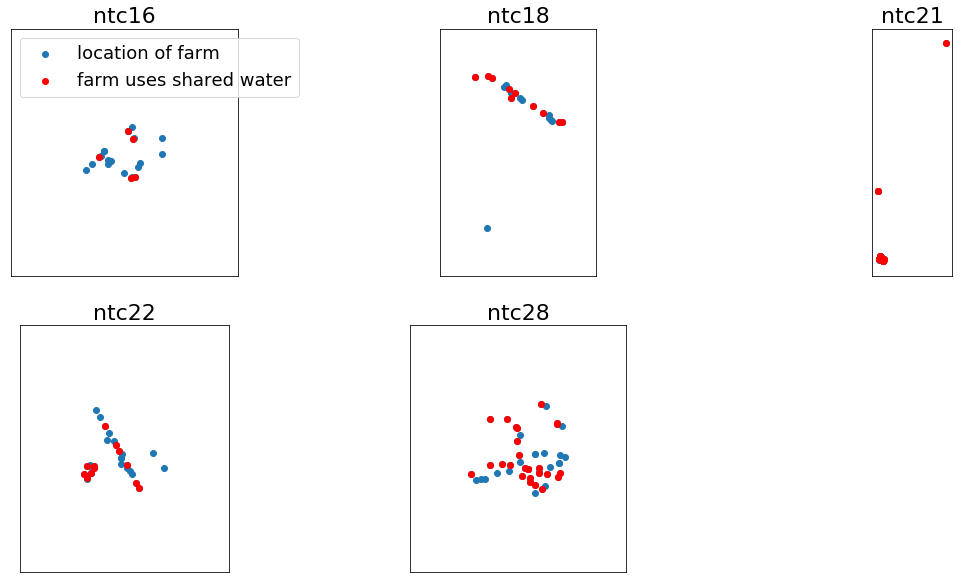

In [51]:
plt.figure(figsize = (20,10))
#Plot spatial distribution of farms sharing water/grazing areas for each study
ind = 0
plt.subplot(1,2,1)
for index, value in enumerate(CompleteData['study'].unique()):
    stud = CompleteData[CompleteData['study']==value]
    if stud['lat'][stud['water_grazing'] == 1].empty == False:
        ind +=1
        plt.subplot(2,3, ind)
        plt.scatter(stud['lat'], stud['long'], label = 'location of farm')
        plt.scatter(stud['lat'][stud['water_grazing'] == 1], stud['long'][stud['water_grazing'] == 1], c = 'red', label = 'farm uses shared water')
        plt.title('{}'.format(value), fontsize = 22)
        plt.xticks([],[]) #anonymizing
        plt.yticks([],[]) #anonymizing
        plt.axis('scaled') #doesn't strech plots, disassort things
        if index == 0:
            plt.legend(loc = 'upper left', fontsize = 18)

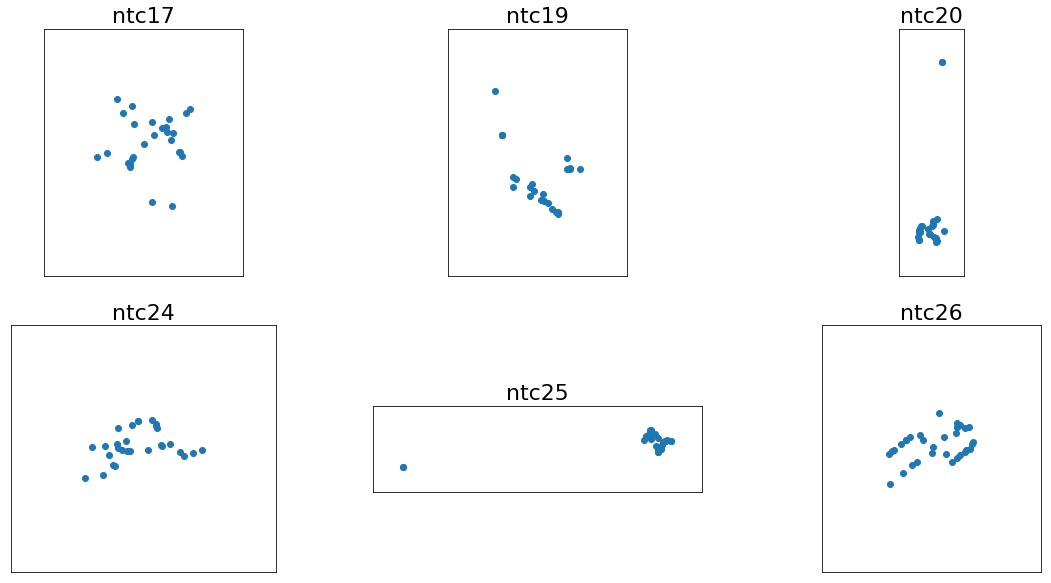

In [52]:
plt.figure(figsize = (20,10))
#Plot spatial distribution of farms sharing water/grazing areas for each study
ind = 0
for index, value in enumerate(CompleteData['study'].unique()):
    stud = CompleteData[CompleteData['study']==value]
    if stud['lat'][stud['water_grazing'] == 1].empty:
        ind +=1
        plt.subplot(2,3, ind)
        plt.scatter(stud['lat'], stud['long'], label = 'location of farm')
        plt.scatter(stud['lat'][stud['water_grazing'] == 1], stud['long'][stud['water_grazing'] == 1], c = 'red', label = 'farm uses shared water')
        plt.title('{}'.format(value), fontsize = 22)
        plt.xticks([],[]) #anonymizing
        plt.yticks([],[]) #anonymizing
        plt.axis('scaled')
        if index == 0:
            plt.legend(loc = 'upper left', fontsize = 18)

In [56]:
# print(CompleteData.columns.values)
xcoord = CompleteData['lat']
ycoord = CompleteData['long']
cattle = CompleteData['cattle']
sheep = CompleteData['sr']
vac = CompleteData['vaccine']
wg = CompleteData['water_grazing']

In [57]:
#Parameter values
        
psi = 0.00657
nu = 1.99*(10**(-7))
xi = 4.65
zeta = 2.80
chi = 0.403
phi = 0.799
rho = 0.000863
epsilon = 0.20 #Vaccine parameter
s = np.random.negative_binomial(50, 50/55, 342) #Draw latent periods
r = np.random.negative_binomial(30, 30/38, 342) #Draw infectious periods

#Calculate distance kernel
K = psi/(psi**2 + dist**2)   

In [ ]:
#Calculate susceptibility

beta1 = np.zeros(342)
beta1 = nu*(xi*(cattle)**chi + (sheep)**chi)

for i in range(0,342):
    if (CompleteData['vaccine'][i] == 1):
       beta1[i] = epsilon*beta1[i]

<IPython.core.display.Javascript object>


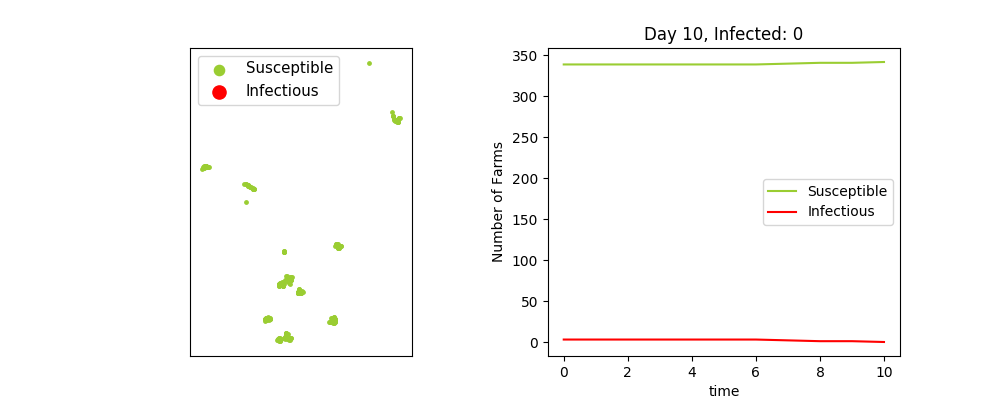

Day 1 Susceptible 339 Exposed 0 Infected 3
Day 2 Susceptible 339 Exposed 0 Infected 3
Day 3 Susceptible 339 Exposed 0 Infected 3
Day 4 Susceptible 339 Exposed 0 Infected 3
Day 5 Susceptible 339 Exposed 0 Infected 3
Day 6 Susceptible 339 Exposed 0 Infected 3
Day 7 Susceptible 339 Exposed 0 Infected 3
Day 8 Susceptible 340 Exposed 0 Infected 2
Day 9 Susceptible 341 Exposed 0 Infected 1
Day 10 Susceptible 341 Exposed 0 Infected 1


In [77]:
for i in range(1):
#Choose initial cases
       
    t = 0
    A = np.zeros(shape=(342,5))
    output = np.zeros(shape=(1000,6))     
    numInf = np.zeros(10000)  

    initial1 = random.randint(0,342)
    initial2 = initial1+1
    initial3 = initial2+1
    I = np.zeros(342)
    I[initial1] = 2
    I[initial2] = 2
    I[initial3] = 2
    A[0, ] = [initial1, 0, s[initial1], r[initial1], vac[initial1]]
    A[1, ] = [initial2, 0, s[initial2], r[initial2], vac[initial2]]
    A[2, ] = [initial3, 0, s[initial3], r[initial3], vac[initial3]]
    
    infectind = [i for i in range(np.size(I)) if I[i]==2]
    susceptind = [i for i in range(np.size(I)) if I[i] ==0]
    
    
    Inf=[len(infectind)]
    Sus = [len(susceptind)]
    time_plot=[0]
    %matplotlib notebook
    start_time = time.time()
    fig = plt.figure(figsize = (10,4))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    plt.ion

    fig.show()
    fig.canvas.draw()
    
    while sum(I==2) +sum(I==1) >0:

        #Calculate transmission rate

        numInf[t] = sum(I == 2)
        t = t + 1
        print("Day", t, "Susceptible", sum(I == 0), "Exposed", sum(I == 1), "Infected", sum(I == 2))

        beta = np.zeros(342)

        for j in range(0,342):
            beta[j] = beta1[j]*(np.sum((zeta*(cattle[I == 2]**chi) + sheep[I == 2]**chi)*K[I == 2, j]))

        #Calculate probability of infection

        prob_inf = 5*(1 - np.exp(-beta)) #why is there a 5 here?
        

        #Infect if probability is less that a uniform sample

        unif = np.random.uniform(0, 1, 342)

        for i in range(0,342):
            if (unif[i] <= prob_inf[i] and I[i] == 0):
                I[i] =  1
                su = sum(I != 0)
                A[su-1, ] = [i, t, s[i], r[i], vac[i]]
                print("Farm", i, "Day", t)

        #Update states

        inf = A[:,0][A[:,1] + A[:,2] == t] #Move to I state once latent period is over
        I[inf.astype(np.int64)] = 2
        rem = A[:,0][A[:,1] + A[:,2] + A[:,3] == t] #Move to S state once infectious period is over
        I[rem.astype(np.int64)] = 0
        
        
        infectind = [i for i in range(np.size(I)) if I[i]==2]
        susceptind = [i for i in range(np.size(I)) if I[i]==0]


        Inf.append(len(infectind))
        Sus.append(len(susceptind))
        
        time_plot.append(t)



        xinfectplot = xcoord[infectind]
        yinfectplot = ycoord[infectind]
        xsusceptplot = xcoord[susceptind]
        ysusceptplot = ycoord[susceptind]


        ax.clear()
        
        ax1.clear()
       
    
        ax1.plot(time_plot,Sus,label='Susceptible', c='yellowgreen')
        ax1.plot(time_plot,Inf,label='Infectious', c='r')
        plt.xlabel('time')
        plt.ylabel('Number of Farms')
        ax1.legend()
        
        
        ax.scatter(xsusceptplot, ysusceptplot, c='yellowgreen', marker='o', s=6, label='Susceptible')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.scatter(xinfectplot, yinfectplot, c='r', marker='o', s=10, label='Infectious')
        ax.axis([0, np.max(xcoord), 0, np.max(ycoord)])

        plt.title('Day {}, Infected: {}'.format(t, np.size(xinfectplot)),fontsize = 12)
        ax.axis('scaled')
        ax.legend(loc = 'upper left', fontsize = 10.8,  markerscale= 3)

        
        
        fig.canvas.draw()
        #Store output

        if len(rem) > 0:
            for i in range(0,len(rem)):
                output[out + i,] = [rem[i], t - A[i,2] - A[i,3], xcoord[rem.astype(np.int64)[i]], ycoord[rem.astype(np.int64)[i]], cattle[rem.astype(np.int64)[i]], sheep[rem.astype(np.int64)[i]]]

    output = output[0:out,]

#     plt.scatter(xcoord[I == 2], ycoord[I == 2], c = 'red')